In [2]:
import cv2
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import cv2

In [21]:
from keras.models import load_model

# Load the model
model = load_model('amharic_alphabet_predect_2.keras')
#other saved models include
#amharic_alphabet_predect_3_not_as_good_as_2.keras
#amharic_alphabet_predect.h5
#amharic_alphabet_predect_2.1.keras
#amharic_alphabet_predect_2.keras
# Recompile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Now you can use the model for predictions or training


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Top three most likely predictions:
Prediction #1: Index 68 with letter 'ች'
Prediction #2: Index 40 with letter 'ሽ'
Prediction #3: Index 65 with letter 'ቺ'
Prediction #4: Index 66 with letter 'ቻ'
Prediction #5: Index 87 with letter 'ኣ'


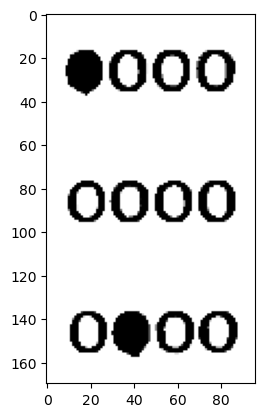

In [22]:
# Load the image
img = cv2.imread(r"C:\Users\Hello\Downloads\a\che.jpg")

# Define custom labels
custom_labels = {
    0: "ሀ", 1: "ሁ", 2: "ሂ", 3: "ሃ", 4: "ሄ", 5: "ህ", 6: "ሆ",
    7: "ለ", 8: "ሉ", 9: "ሊ", 10: "ላ", 11: "ሌ", 12: "ል", 13: "ሎ",
    14: "መ", 15: "ሙ", 16: "ሚ", 17: "ማ", 18: "ሜ", 19: "ም", 20: "ሞ",
    21: "ሠ", 22: "ሡ", 23: "ሢ", 24: "ሣ", 25: "ሤ", 26: "ሥ", 27: "ሦ",
    28: "ረ", 29: "ሩ", 30: "ሪ", 31: "ራ", 32: "ሬ", 33: "ር", 34: "ሮ",
    35: "ሸ", 36: "ሹ", 37: "ሺ", 38: "ሻ", 39: "ሼ", 40: "ሽ", 41: "ሾ",
    42: "ቀ", 43: "ቁ", 44: "ቂ", 45: "ቃ", 46: "ቄ", 47: "ቅ", 48: "ቆ",
    49: "በ", 50: "ቡ", 51: "ቢ", 52: "ባ", 53: "ቤ", 54: "ብ", 55: "ቦ",
    56: "ተ", 57: "ቱ", 58: "ቲ", 59: "ታ", 60: "ቴ", 61: "ት", 62: "ቶ",
    63: "ቸ", 64: "ቹ", 65: "ቺ", 66: "ቻ", 67: "ቼ", 68: "ች", 69: "ቾ",
    70: "ነ", 71: "ኑ", 72: "ኒ", 73: "ና", 74: "ኔ", 75: "ን", 76: "ኖ",
    77: "ኘ", 78: "ኙ", 79: "ኚ", 80: "ኛ", 81: "ኜ", 82: "ኝ", 83: "ኞ",
    84: "አ", 85: "ኡ", 86: "ኢ", 87: "ኣ", 88: "ኤ", 89: "እ", 90: "ኦ",
    91: "ከ", 92: "ኩ", 93: "ኪ", 94: "ካ", 95: "ኬ", 96: "ክ", 97: "ኮ",
}

# Check if image is loaded successfully
if img is not None:
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #threshold = 90  # dark
    threshold = 128  # bright
    # Apply threshold to convert to black and white
    _, bw_img = cv2.threshold(gray_img, threshold, 255, cv2.THRESH_BINARY)
    
    # Resize image
    resized_img = cv2.resize(bw_img, (96, 170))
    
    # Convert grayscale image to 3-channel image
    input_img = np.stack((resized_img,) * 3, axis=-1)
    
    # Normalize image
    normalized_img = input_img / 255.0
    
    # Ensure batch dimension
    input_img_with_batch = np.expand_dims(normalized_img, axis=0)
    
    # Visualize the image
    plt.imshow(resized_img, cmap='gray')
    
    # Assuming model.predict function expects normalized input
    prediction = model.predict(input_img_with_batch)
    
    # Get the top three most likely indices
    top_three_indices = np.argsort(prediction[0])[::-1][:5]
    
    # Print the top three predicted indices and their corresponding labels
    print("Top three most likely predictions:")
    for i, index in enumerate(top_three_indices):
        custom_label = custom_labels.get(index, "Unknown")
        print(f"Prediction #{i+1}: Index {index} with letter '{custom_label}'")
else:
    print("Error: Failed to load the image.")
